In [36]:
import numpy as np
import matplotlib.pyplot as plt
from statistic_eval import MetricRegistry, Evaluator



In [37]:

training = np.load("data/stocknet_81.npy")
factor_dm_full = np.load("samples/factorDM4096.npy")
SB_full = np.load("samples/SB4096.npy")

print(f"Training: {training.shape}")
print(f"FactorDM: {factor_dm_full.shape}")
print(f"SB: {SB_full.shape}")

Training: (1257, 81)
FactorDM: (4096, 81)
SB: (4096, 81)


In [38]:
np.save("samples/factorDM2048.npy", factor_dm_full[:2048])
np.save("samples/SB2048.npy", SB_full[:2048])

In [29]:
def run_convergence(Y: np.ndarray, X_full: np.ndarray, sizes):
    
    results = {}

    p = 0
    for s in sizes:
        X = X_full[:s]
        p += s
        results[s] = np.linalg.norm(np.mean(X, axis=0) - np.mean(Y, axis=0))
    
    return results

In [31]:
# Run convergence experiment
sizes = [32, 64, 128, 256, 512, 1024, 2048, 4096]
results_dm = run_convergence(training, factor_dm_full, sizes)

results_sb = run_convergence(training, SB_full, sizes)


In [32]:
results_sb

{32: np.float64(0.01866154341399815),
 64: np.float64(0.010957888676547674),
 128: np.float64(0.007964243077454605),
 256: np.float64(0.005540208182330864),
 512: np.float64(0.004539671391945224),
 1024: np.float64(0.002602833273490233),
 2048: np.float64(0.0019399885350909693),
 4096: np.float64(0.001629188258716432)}

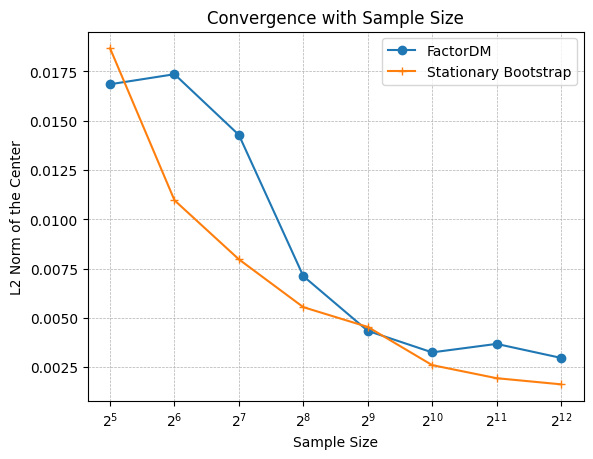

In [35]:
# Plot results

plt.plot(list(results_dm.keys()), list(results_dm.values()), label='FactorDM', marker='o')
plt.plot(list(results_sb.keys()), list(results_sb.values()), label='Stationary Bootstrap', marker='+')
plt.xscale('log', base=2)
plt.xlabel('Sample Size')
plt.ylabel('L2 Norm of the Center')
plt.title('Convergence with Sample Size')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.savefig('convergence_experiment.png', dpi=300)
plt.show()